In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# data file name
CSV_FILE = 'data.csv'

# Algorithm parameters
LAG = 30
THRESHOLD = 7
INFLUENCE = 0

In [2]:
def z_score_algorithm(y, lag, threshold, influence):
    # Initialize variables
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)

    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1
            # Adjust the filters
            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])
        else:
            signals[i] = 0
            # filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))


def read_csv(file_name):
    with open('data.csv') as csvfile:
        reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
        return reader.__next__()


def draw_graph(signals, z_scroe):
    length = len(signals)

    # Calculate average of the data
    y_mean = [np.mean(signals)] * length

    # Calcluate the threshold in the algorithm
    thresholds = result['avgFilter'] + THRESHOLD * result['stdFilter']
    thresholds[0:LAG-1] = y_mean[0:LAG-1]

    # Draw Graph
    plt.figure(figsize=(50, 20))
    plt.subplot(2, 1, 1)
    plt.title('Signal data with avg and threshold')
    plt.plot(signals,'b', label='Signals')
    # plt.plot(y_mean, 'c--', label="Mean")
    # plt.plot(thresholds, 'm-.', label="thresholds")
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.title('Signal output')
    plt.plot(z_scroe)
    plt.grid(True)
    plt.show()


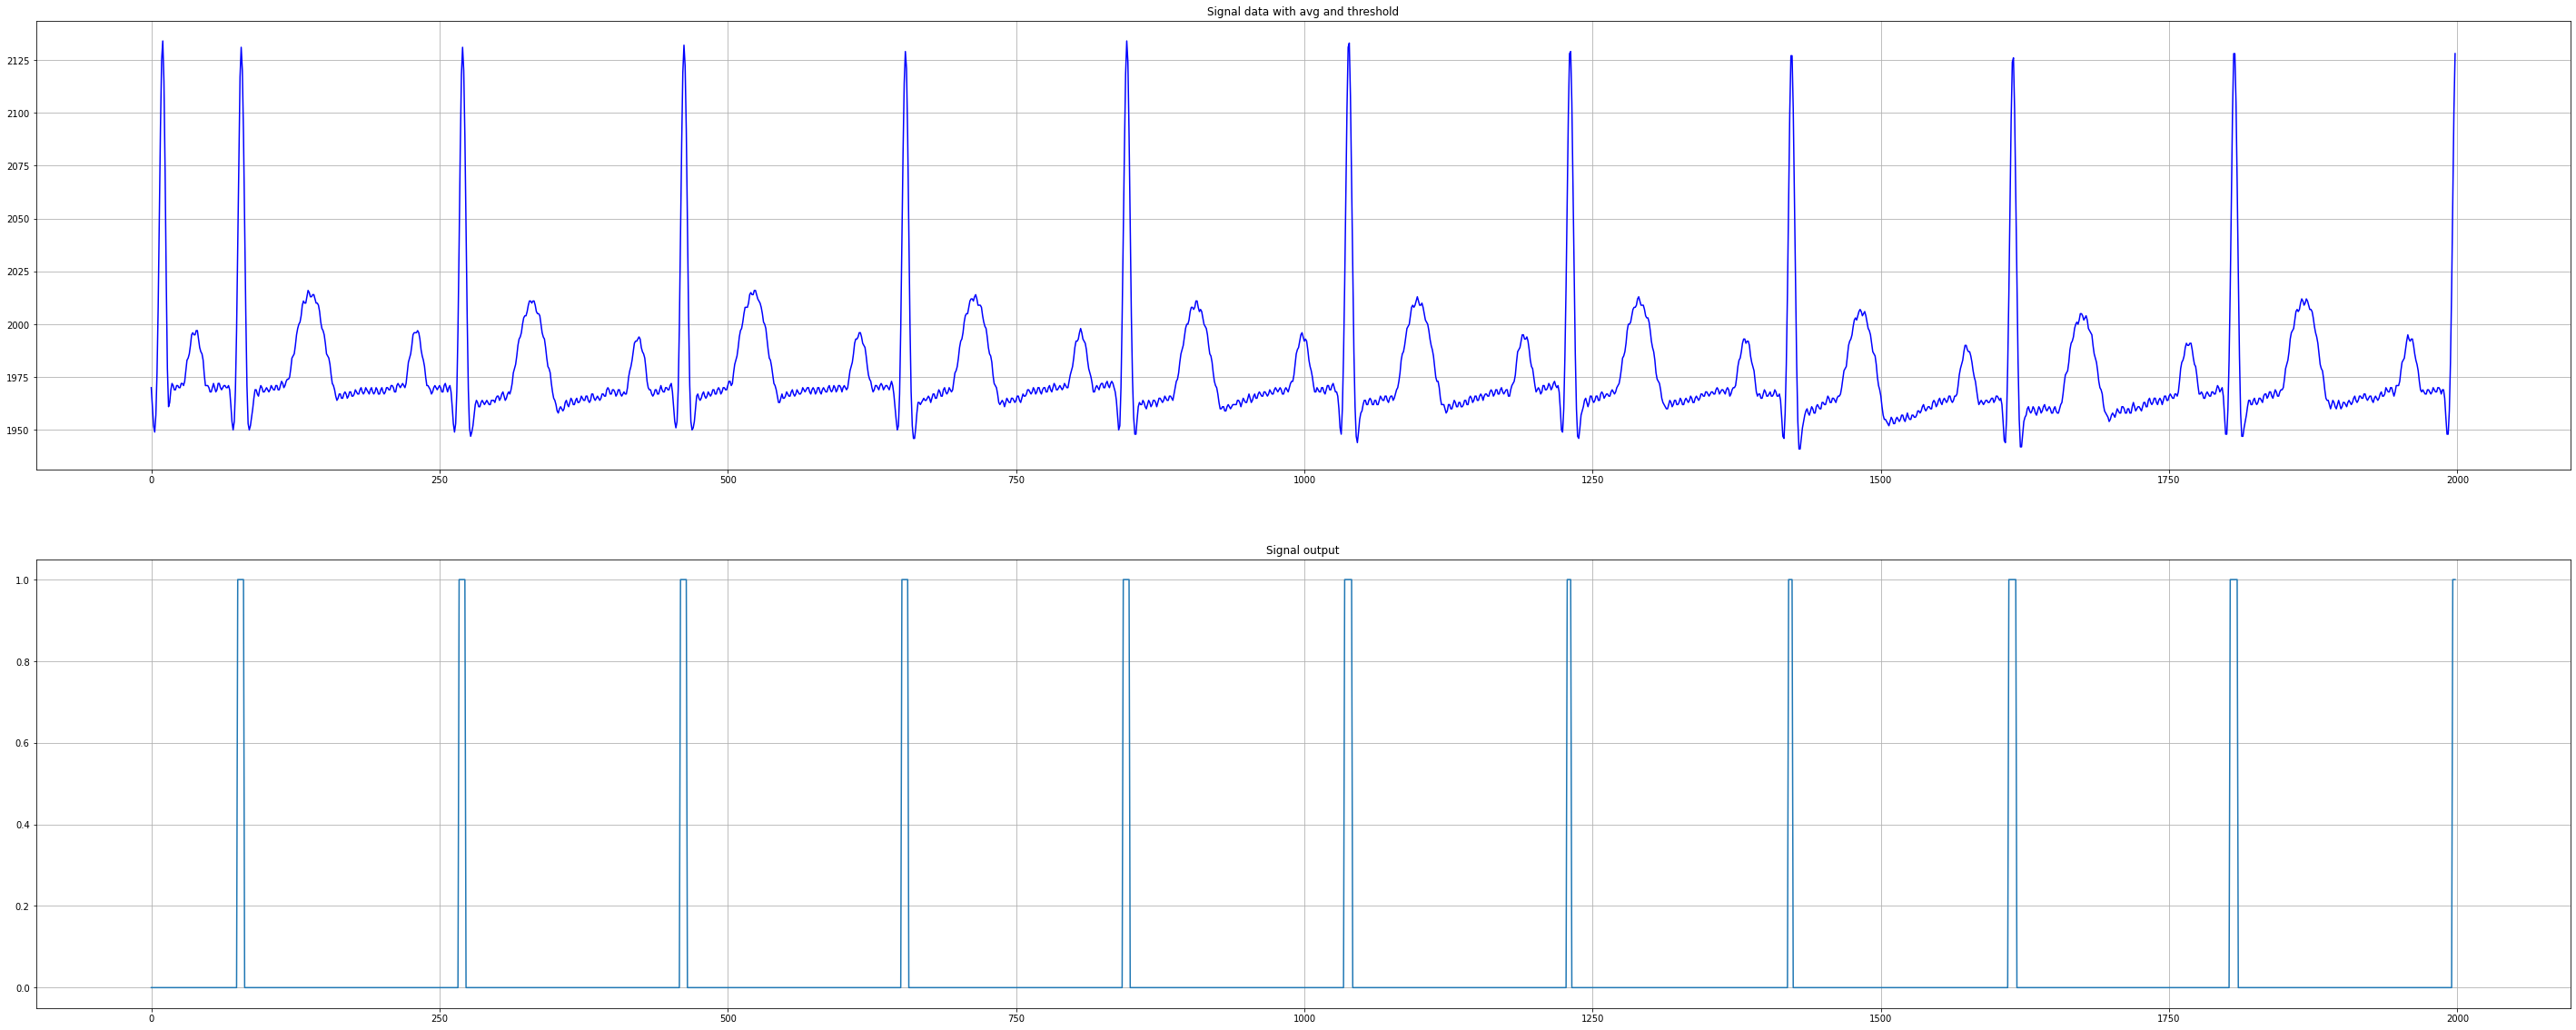

In [3]:
data = read_csv(CSV_FILE)
result = z_score_algorithm(data, lag=LAG, threshold=THRESHOLD, influence=INFLUENCE)
draw_graph(data, result['signals'])